# Abstract

This report presents a linear programming (LP) model designed to optimize an investment portfolio across range of assets, including stocks, commodities, cryptocurrencies, indices, and bond ETFs. Utilizing a 10 years of historical data downloaded from yahoo finance. The model aims to maximize the portfolio's expected return while managing risk through diversification and adhering to specified investment constraints. 

By focusing on optimizing the Sharpe Ratio, our model systematically evaluates potential returns against associated risks, offering a structured approach to achieving the most favorable risk-adjusted returns. This optimization framework ensures that the portfolio is not only geared towards high returns but also meticulously calibrated to manage risk effectively.

# Problem statement

An investor is prepared to allocate 1,000,000 euros towards creating a diversified investment portfolio. He seeks assistance in choosing the best possible assets for his portfolio to outperform the yield that he gets from his bank as a risk-free return (1%). The analysis should be conducted on the last 10 years of data. The goal is to optimize the portfolio's Sharpe Ratio, a measure of risk-adjusted return, to maximize gains relative to the risk taken. The planned approach encompasses:

1) **Capital Distribution:** Funds will be spread across stocks, commodities, cryptocurrencies, indices, and bond ETFs for diverse growth opportunities.

2) **Diversification:** The strategy includes broad asset class diversification and within-class diversification to reduce risk.

3) **Risk Alignment:** Investments will match the investor's risk tolerance, balancing potential returns with acceptable risk levels.

4) **Outperform risk free return:** The portfolio aims outperform specific risk free return target, ensuring the investment efforts are worthwhile.

5) **Investment Limits:** Minimum and maximum investment limits will be set for each asset and class to maintain a balanced portfolio.

6) **Sector Caps:** Constraints will limit investment in any single sector to prevent over-concentration and promote sectoral diversification.

7) **Volatility Management:** Constraints will limit portfolio volatility to match the investor's risk tolerance, ensuring comfort with the investment's ups and downs.

8) **Market Indicators Integration:** Incorporation of market indicators and signals, including RSA, into the linear programming model to guide investment decisions.




# Data

- Sources: https://finance.yahoo.com/
- Downloaded via lib: import yfinance as yf
- All data are in folders: data/<type>/<ticker_ohlc>.csv

1. **Assumption**: For the purpose of this assignment, we will assign a numerical risk level to each asset based on its type, simplifying our approach to risk evaluation. We categorize the level of risk as follows:

- **Low Risk - 1**: Stocks, Bonds
- **Moderate Risk - 2**: Indices, Commodities
- **High Risk - 3**: Cryptocurrencies



2. **Assumption**: *: In this analysis, we assume that the Relative Strength Index (RSI) is used as an indicator of market momentum. Specifically, we interpret RSI values above 70 as indicating overbought conditions and RSI values below 30 are interpreted as oversold conditions. In our condition we will consider value of 80 as too big and wont consider the asset for buying

- **Average Gain**:
   $$ \text{Average Gain} = \frac{\text{Sum of gains over } n \text{ periods}}{n} $$

- **Average Loss**:
   $$ \text{Average Loss} = \frac{\text{Sum of losses over } n \text{ periods}}{n} $$

- **Relative Strength (RS)**:
   $$ RS_t = \frac{\text{Average Gain}}{\text{Average Loss}} $$

- **Relative Strength Index (RSI)**:
   $$ RSI_t = 100 - \left( \frac{100}{1 + RS_t} \right) $$


## Mathematical model 


Given the data with OHLC (Open, High, Low, Close) data for various asset types, we aim to develop a sophisticated mathematical model for optimizing an investment portfolio. This model emphasizes the importance of volatility as a proxy for risk and seeks to maximize the risk-adjusted returns. The Sharpe Ratio, which assesses the performance of an investment by comparing its risk-adjusted return to a risk-free asset, will be utilized as the objective function for maximization.

The objective function:

$$
\text{Maximize} \quad Z = \frac{\sum_{i \in \text{Assets}} (r_i - r_f) \cdot x_i}{\sqrt{\sum_{i \in \text{Assets}} \sum_{j \in \text{Assets}} x_i \cdot \sigma_{ij} \cdot x_j}}
$$

where:

- $Z$ is the Sharpe Ratio of the portfolio,
- $r_i$ represents the expected return of asset $i$, as derived from OHLC data,
- $r_f$ denotes the risk-free rate,
- $x_i$ symbolizes the investment proportion in asset $i$,
- $\sigma_{ij}$ the covariance between the returns of asset $i$ and asset $j$, for all pairs of assets within the portfolio.
- $\text{Assets}$ encapsulates the set of all available assets for investment.

#### Constraints:

1. **Total Investment Constraint**: Ensure the sum of investments equals the available capital:

$$
\sum_{i \in \text{Assets}} x_i = 1,000,000
$$

2. **Diversification Constraints**: Impose minimum and maximum investment limits for each asset:

$$
\text{Min}_i \times 1,000,000 \leq x_i \leq \text{Max}_i \times 1,000,000 \quad \forall i \in \text{Assets}
$$

3. **Sector Caps**: To avoid over-concentration in any single sector, enforce sector allocation limits:

$$
\sum_{i \in \text{Sector}_k} x_i \leq \text{Cap}_{\text{Sector}_k} \times 1,000,000 \quad \forall k \in \text{Sectors}
$$

where $\text{Cap}_{\text{Sector}_k}$ represents the maximum allowable investment proportion in sector $k$, ensuring diversified exposure across various economic sectors.


4. **Outperform Risk-Free Return**: The expected portfolio return must exceed the risk-free rate:

$$
\frac{\sum_{i \in \text{Assets}} (r_i - r_f) \cdot x_i}{\sqrt{\sum_{i \in \text{Assets}} \sum_{j \in \text{Assets}} x_i \cdot \sigma_{ij} \cdot x_j}} > r_f
$$

5. **Non-negativity and Upper Limit Constraints**: All investment proportions must be non-negative, and an upper limit can be enforced to prevent over-allocation to any single asset:

$$
0 \leq x_i \leq \text{UpperLimit}_i \quad \forall i \in \text{Assets}
$$

where $\text{UpperLimit}_i$ is the maximum allowable investment proportion in asset $i$, safeguarding against excessive concentration.


6. **Market Indicators Integration**: For assets selected based on specific market indicators like the Relative Strength Index (RSI), integrate indicator-based constraints. This can be a qualitative filter applied before quantitative optimization:

$$
\text{If } \text{RSI}(i) < \text{Threshold}_{\text{buy}}, \text{ then include } i \text{ in optimization}
$$

We will consider treshold as 80

7. **Risk level assumption**: We assign numerical values to represent each risk category and impose a constraint that ensures the portfolio's overall risk does not exceed a specified threshold. Let's denote the numerical risk values as $R_{\text{low}} = 1$, $R_{\text{moderate}} = 2$, and $R_{\text{high}} = 3$. The portfolio's total risk level, $R_{\text{total}}$, is calculated as a weighted sum of these values:

$$
R_{\text{total}} = \sum_{i \in \text{LowRiskAssets}} x_i \cdot R_{\text{low}} + \sum_{i \in \text{ModerateRiskAssets}} x_i \cdot R_{\text{moderate}} + \sum_{i \in \text{HighRiskAssets}} x_i \cdot R_{\text{high}}
$$

The constraint to maintain the portfolio's risk within an acceptable threshold can be expressed as:

$$
R_{\text{total}} \leq R_{\text{threshold}}
$$

where $R_{\text{threshold}}$ is the predefined maximum acceptable total risk level for the portfolio.

This constraint ensures that the portfolio's composition reflects the investor's risk tolerance by limiting the weighted contribution of assets based on their risk categories. It mandates a balanced approach to allocating capital across low, moderate, and high-risk assets, in line with the overarching goal of optimizing the Sharpe Ratio while adhering to risk considerations.



In [1]:
import pandas as pd
import numpy as np
import glob
import os

def calculate_rsi(data, period=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()

    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI


def calculate_ear_and_rsi(folder_path):
    start_date = '2014-01-01'
    end_date = '2019-12-31'
    results = []
    csv_files = [f for f in glob.glob(os.path.join(folder_path, '*.csv')) if not os.path.basename(f).startswith("expected_")]
    
    for file_path in csv_files:
        df = pd.read_csv(file_path)
        df['Date'] = pd.to_datetime(df['Date'])
        
        # Calculate EAR for 2014-2019
        df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
        daily_returns = df_filtered['Adj Close'].pct_change().dropna()
        mean_daily_return = daily_returns.mean()
        trading_days = daily_returns.shape[0] if 'crypto_' in file_path else 252
        expected_annual_return = mean_daily_return * trading_days * 100
        
        # Calculate RSI for 2014-2019
        rsi = calculate_rsi(df_filtered['Adj Close']).iloc[-1]
        
        # Initialize a dictionary to store the results
        asset_result = {'Asset': os.path.splitext(os.path.basename(file_path))[0], 'EAR_2014-2019': expected_annual_return, 'RSI_2014-2019': rsi}
        
        # Calculate EAR for each year from 2020 onwards
        for year in range(2020, 2024): 
            year_start_date = f"{year}-01-01"
            year_end_date = f"{year}-12-31"
            df_yearly = df[(df['Date'] >= year_start_date) & (df['Date'] <= year_end_date)]
            daily_returns_yearly = df_yearly['Adj Close'].pct_change().dropna()
            mean_daily_return_yearly = daily_returns_yearly.mean()
            trading_days_yearly = daily_returns_yearly.shape[0] if 'crypto_' in file_path else 252
            ear_yearly = mean_daily_return_yearly * trading_days_yearly * 100
            asset_result[f'EAR_{year}'] = ear_yearly
        
        # Append the asset results to the results list
        results.append(asset_result)

    results_df = pd.DataFrame(results)
    return results_df

In [2]:
aggregate_results = {}
folder = "data_all"

results_df = calculate_ear_and_rsi(folder)
results_df.to_csv('aggregate_expected_annual_returns.csv', index=False)

print(f"Processed {folder}")

Processed data_all


In [3]:
folder = "data/outperform"
outperform_df = calculate_ear_and_rsi(folder)
outperform_df.to_csv('outperform.csv', index=False)
print(f"Processed {folder}")

Processed data/outperform


In [4]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

expected_returns = results_df['EAR_2014-2019'].values / 100
assets = results_df['Asset'].tolist()

constraints = []

cov_matrix = np.random.rand(len(assets), len(assets))
cov_matrix = cov_matrix @ cov_matrix.T
np.fill_diagonal(cov_matrix, cov_matrix.diagonal() * 10)


# 1 Total investment constraint
# Ensures that the sum of all investment proportions equals 1 (100% of the portfolio),
# meaning all available capital is allocated without any shortage or excess.
def total_investment_constraint(x):
    return np.sum(x) - 1 
constraints.append({'type': 'eq', 'fun': total_investment_constraint})


# 2 Diversification constraint
# Ensures that each asset's investment proportion is within predefined minimum and maximum bounds,
# promoting diversification by preventing over-concentration in any single asset.
num_assets = len(assets)
min_investments = np.random.uniform(0.01, 0.1, num_assets)
max_investments = np.random.uniform(0.2, 0.4, num_assets)
max_investments = np.maximum(max_investments, min_investments + 0.1)

def investment_constraints(x, i):
    return max_investments[i] - x[i], x[i] - min_investments[i]

for i in range(len(assets)):
    constraints.append({'type': 'ineq', 'fun': lambda x, i=i: investment_constraints(x, i)[0]})
    constraints.append({'type': 'ineq', 'fun': lambda x, i=i: investment_constraints(x, i)[1]})


# 3 Sector cap constraint
# Limits the total investment in each predefined sector (e.g., bonds, commodities) to a specified cap,
# ensuring sector-level diversification and managing sector-specific risks.
sectors  = {
    'bonds': [],
    'commod': [],
    'crypto': [],
    'indices': [],
    'stocks': []
}

for asset in results_df['Asset']:
    for category in sectors :
        if asset.startswith(category):
            sectors[category].append(asset)

sector_caps = {
    'bonds': 0.20,  
    'commod': 0.25,  
    'crypto': 0.10, 
    'indices': 0.20,
    'stocks': 0.25
}

def sector_cap_constraint(x, sector_assets, cap):
    sector_indices = [assets.index(asset) for asset in sector_assets if asset in assets]
    sector_allocation = np.sum([x[i] for i in sector_indices])
    return cap - sector_allocation

for sector, cap in sector_caps.items():
    constraints.append({'type': 'ineq', 'fun': lambda x, sa=sectors[sector], c=cap: sector_cap_constraint(x, sa, c)})



# 4 outperform risk-free return
# Aims to ensure that the portfolio's expected return exceeds the risk-free rate after adjusting for risk (volatility),
# promoting the selection of investments that offer a risk-adjusted return better than simply holding risk-free assets. 

risk_free_rate = 0.01         
def outperform_risk_free_constraint(x, expected_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.dot(x, expected_returns)
    portfolio_volatility = np.sqrt(np.dot(x.T, np.dot(cov_matrix, x)))
    return (portfolio_return - risk_free_rate) - portfolio_volatility - risk_free_rate
constraints.append({'type': 'ineq', 'fun': lambda x: outperform_risk_free_constraint(x, expected_returns, cov_matrix, risk_free_rate)})



# 5 Non negative upper constraint
# Applied via the 'bounds' parameter, this constraint ensures that each asset's allocation
# is non-negative and does not exceed 100% of the portfolio, enforcing logical investment proportions.
bounds = [(0, 1) for _ in assets]


# 6 - RSI BUY only if less then 90
# Adjusts the bounds for assets based on their RSI values, setting the allocation bounds to (0, 0) for assets with an RSI over 90,
# effectively excluding assets considered overbought and potentially at risk of a price downturn.
for i, (asset, rsi) in enumerate(zip(results_df['Asset'], results_df['RSI_2014-2019'])):
    if rsi > 80:
        bounds[i] = (0, 0)


# 7 risk free constraint negative constraint
# Ensures the portfolio's overall risk level, calculated as a weighted sum of predefined risk values for each asset category,
# does not exceed a specified risk threshold, facilitating control over the portfolio's risk profile.        
R_threshold = 3  # Example threshold
risk_values_dict = {
    'bonds': 1,  # Low risk
    'commod': 2,  # Moderate risk
    'crypto': 3,  # High risk
    'indices': 2,  # Moderate risk
    'stocks': 2   # Moderate risk
}

risk_values = np.array([risk_values_dict[asset.split('_')[0]] for asset in assets])
def risk_level_constraint(x):
    R_total = np.dot(x, risk_values)
    return R_threshold - R_total

constraints.append({'type': 'ineq', 'fun': risk_level_constraint})



# ------- Mathematical Model ----------
def neg_sharpe_ratio(weights, expected_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio 



init_guess = np.array([1./len(assets)] * len(assets))
result = minimize(neg_sharpe_ratio, init_guess, args=(expected_returns, cov_matrix, risk_free_rate),
                  method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights
optimal_weights = result.x
for asset, weight in zip(results_df['Asset'], optimal_weights):
    print(f"{asset}: {weight:.2%}")    

bonds_BND_OHLC: 4.00%
bonds_JNK_OHLC: 0.00%
bonds_LQD_OHLC: 1.35%
bonds_TIP_OHLC: 4.00%
bonds_TLT_OHLC: 4.00%
commod_CL=F_OHLC: 4.00%
commod_GC=F_OHLC: 0.00%
commod_HG=F_OHLC: 3.71%
commod_NG=F_OHLC: 2.43%
commod_SI=F_OHLC: 0.00%
crypto_ADA-USD_OHLC: 4.08%
crypto_BCH-USD_OHLC: 4.00%
crypto_DOGE-USD_OHLC: 3.92%
crypto_ETH-USD_OHLC: 4.00%
crypto_XRP-USD_OHLC: 4.00%
indices_^BSESN_OHLC: 4.00%
indices_^DJI_OHLC: 4.00%
indices_^FCHI_OHLC: 4.00%
indices_^FTSE_OHLC: 4.00%
indices_^GDAXI_OHLC: 4.00%
stocks_AAPL_OHLC: 0.00%
stocks_AMZN_OHLC: 4.00%
stocks_GOOGL_OHLC: 4.00%
stocks_MSFT_OHLC: 3.56%
stocks_NVDA_OHLC: 8.95%


In [111]:
total_investment = 1_000_000  
investment_by_asset = optimal_weights * total_investment 

print("Allocated Investment by Asset:")
for asset, investment in zip(results_df['Asset'], investment_by_asset):
    print(f"{asset}: €{investment:.2f}")

performance_results = {}

for year in ['EAR_2020', 'EAR_2021', 'EAR_2022', 'EAR_2023']:
    performance_results[year] = np.sum(investment_by_asset * (results_df[year].values / 100))

print("\nPerformance Results:")
for year, performance in performance_results.items():
    print(f"Total Portfolio Value by the end of {year[-4:]}: €{performance + total_investment:.2f}")


Allocated Investment by Asset:
bonds_BND_OHLC: €21232.65
bonds_JNK_OHLC: €0.00
bonds_LQD_OHLC: €40000.00
bonds_TIP_OHLC: €40000.00
bonds_TLT_OHLC: €40000.00
commod_CL=F_OHLC: €21525.11
commod_GC=F_OHLC: €0.00
commod_HG=F_OHLC: €36067.94
commod_NG=F_OHLC: €40000.00
commod_SI=F_OHLC: €0.00
crypto_ADA-USD_OHLC: €59518.16
crypto_BCH-USD_OHLC: €40000.00
crypto_DOGE-USD_OHLC: €40000.00
crypto_ETH-USD_OHLC: €20481.84
crypto_XRP-USD_OHLC: €40000.00
indices_^BSESN_OHLC: €33192.51
indices_^DJI_OHLC: €26868.44
indices_^FCHI_OHLC: €40000.00
indices_^FTSE_OHLC: €40000.00
indices_^GDAXI_OHLC: €11113.35
stocks_AAPL_OHLC: €0.00
stocks_AMZN_OHLC: €65135.68
stocks_GOOGL_OHLC: €41218.48
stocks_MSFT_OHLC: €49117.82
stocks_NVDA_OHLC: €94528.02

Performance Results:
Total Portfolio Value by the end of 2020: €1448539.16
Total Portfolio Value by the end of 2021: €1864875.51
Total Portfolio Value by the end of 2022: €698446.71
Total Portfolio Value by the end of 2023: €1420374.63


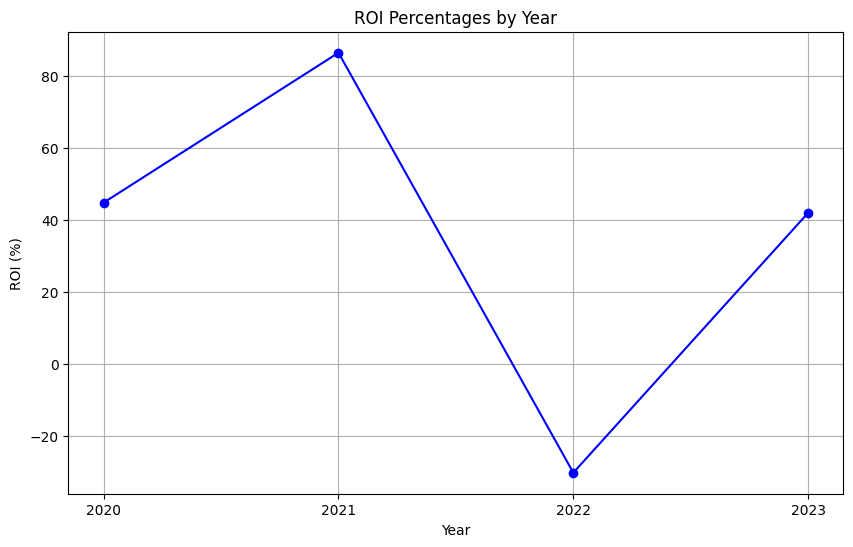

In [112]:
import matplotlib.pyplot as plt

roi_percentages = []

for year in ['EAR_2020', 'EAR_2021', 'EAR_2022', 'EAR_2023']:
    yearly_performance = np.sum(investment_by_asset * (results_df[year].values / 100))
    roi = (yearly_performance / total_investment) * 100  # Calculate ROI as a percentage
    roi_percentages.append(roi)

years = [2020, 2021, 2022, 2023]

# Plotting the ROI percentages
plt.figure(figsize=(10, 6))
plt.plot(years, roi_percentages, marker='o', linestyle='-', color='b')
plt.title('ROI Percentages by Year')
plt.xlabel('Year')
plt.ylabel('ROI (%)')
plt.xticks(years)
plt.grid(True)
plt.show()

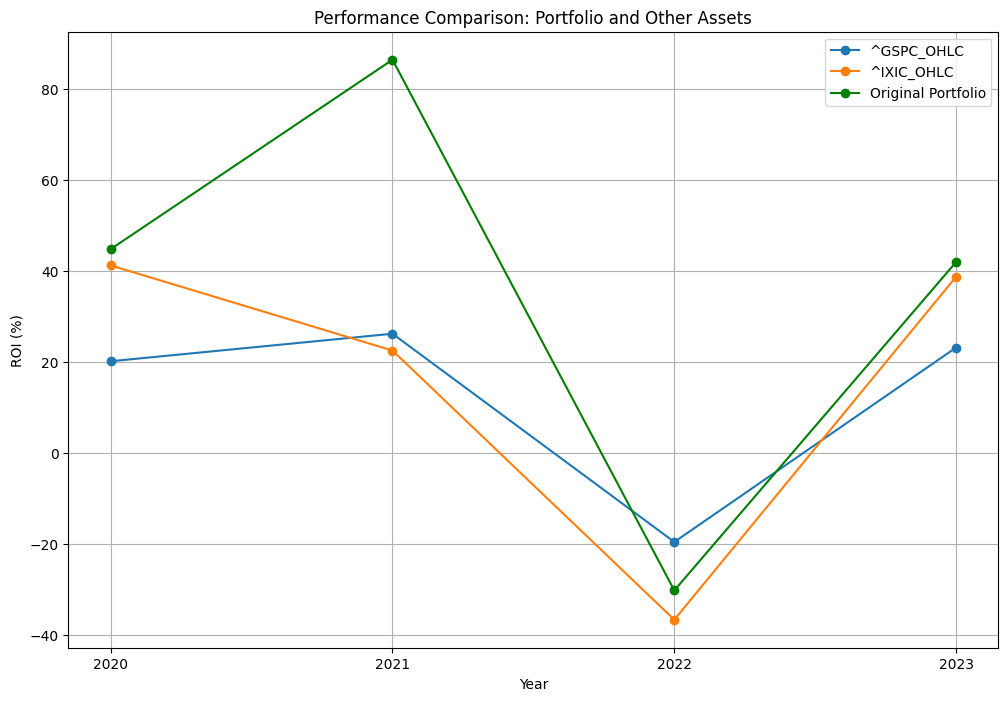

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

performance_df = pd.read_csv('outperform.csv')
years = [2020, 2021, 2022, 2023]

plt.figure(figsize=(12, 8))

for index, row in performance_df.iterrows():
    asset_ear = row[['EAR_2020', 'EAR_2021', 'EAR_2022', 'EAR_2023']].values
    plt.plot(years, asset_ear, marker='o', linestyle='-', label=row['Asset'])

plt.plot(years, roi_percentages, marker='o', linestyle='-', color='green', label='Original Portfolio')
plt.title('Performance Comparison: Portfolio and Other Assets')
plt.xlabel('Year')
plt.ylabel('ROI (%)')
plt.xticks(years)
plt.legend()
plt.grid(True)

plt.show()